In [1]:
import numpy as np

import adaptive_latents.input_sources.datasets as datasets
import adaptive_latents.plotting_functions as pf
import matplotlib.pyplot as plt
import prediction_regression_pipeline as prp
from adaptive_latents.plotting_functions import PredictionVideo
from adaptive_latents import (
    AnimationManager
)
import adaptive_latents
import pandas as pd
from importlib import reload
from IPython import display



* [jPCA figure](https://www.dropbox.com/scl/fo/duf5zbwcibsux467c6oc9/AIN-ZiFsy2Huyh8h7VMdL7g?dl=0&e=1&preview=Basic+jPCA+plot.pdf&rlkey=3o5axmq5hirel4cij7g64jc0r)
* [gpfa figure](https://users.ece.cmu.edu/~byronyu/software.shtml)
* [lfads figure](https://www.nature.com/articles/s41592-018-0109-9/figures/1) (copied from the paper)
* [cebra figure](https://www.nature.com/articles/s41586-023-06031-6/figures/1) (copied from the paper)

In [2]:
!echo $(hostname) $(git rev-parse --short HEAD)

tycho bc8f300


In [49]:
from adaptive_latents.plotting_functions import plot_history_with_tail
adaptive_latents.plotting_functions = reload(adaptive_latents.plotting_functions)

# Intro Video

In [4]:
def intro_plot(d, tail_length=5, duration=10, start_time=10, fps=20):
    with AnimationManager(n_cols=2, n_rows=1, figsize=(10, 5), filetype='mp4', fps=fps) as am:
        am.axs[0,1].scatter(d.behavioral_data.a[:,0,0], d.behavioral_data.a[:,0,1])
        for current_t in np.linspace(start_time, start_time + duration, duration*fps):
            am.axs[0,0].cla()
    
            n_columns = np.floor(tail_length / np.median(np.diff(d.neural_data.t))).astype(int)
            idx = np.nonzero(~(d.neural_data.t < current_t))[0][0]
            
            
            am.axs[0,0].imshow(d.neural_data.a[idx-n_columns:idx,0,:].T, aspect='auto', interpolation='none', extent=[current_t - tail_length, current_t, d.neural_data.a.shape[2], 0],
                              vmin=d.neural_data.a.min(),vmax=d.neural_data.a.max())
            am.axs[0,0].set_xticklabels([])
    
    
    
            old_lims = am.axs[0,1].axis()
            am.axs[0,1].cla()
            am.axs[0,1].axis('off')
            
            s = ((current_t - tail_length) < d.behavioral_data.t) & (d.behavioral_data.t < current_t)
            am.axs[0,1].plot(d.behavioral_data.a[s,0,0], d.behavioral_data.a[s,0,1])
            pf.use_bigger_lims(am.axs[0,1], old_lims)
            
            am.grab_frame()
    
    display.display(display.Video(am.outfile, embed=True))
    plt.close()

In [5]:
d = datasets.Odoherty21Dataset()
intro_plot(d)

A newer version (0.63.1) of dandi/dandi-cli is available. You are using 0.63.0
/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [6]:
d = datasets.Peyrache15Dataset()
intro_plot(d,start_time=16185)

In [7]:
d = datasets.Zong22Dataset()
intro_plot(d)

In [8]:
d = datasets.Schaffer23Datset()
intro_plot(d, start_time=150)

/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.3.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [9]:
d = datasets.TostadoMarcos24Dataset()
intro_plot(d)


# Odoherty21 Portion

## Intro video

## Trajectory with 2d histogram background

In [10]:
odoherty_run = prp.PipelineRun(**prp.PipelineRun.default_parameter_values['odoherty21'])
run = odoherty_run

/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


  0%|          | 0/649.1 [00:00<?, ?it/s]

/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/numba/core/typed_passes.py:336: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../../../miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/mmica/_densities.py", line 44:
@jit(parallel=True, fastmath=True, nopython=True)
def logp_u(Y):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,


In [11]:
run = odoherty_run
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))


tail_length = 1
with AnimationManager(fig=fig, make_axs=False, fps=20, filetype='mp4') as am:
    for current_t in np.linspace(600, 610, 200):
        plot_history_with_tail(axs[0], run.neural_target, current_t, tail_length, hist_bins=30)
        plot_history_with_tail(axs[1], run.jpca_latents,  current_t, tail_length, hist_bins=30)
        plot_history_with_tail(axs[2], run.beh_target, current_t, tail_length, hist_bins=30)
        am.grab_frame()

plt.close();
display.display(display.Video(am.outfile, embed=True))

## Data, Latent, Prediction graph

In [12]:
run = odoherty_run

import adaptive_latents.plotting_functions
pv = reload(adaptive_latents.plotting_functions).PredictionVideo(run.d, fps=20, filetype='mp4')



assert (run.next_bubble_joint_predictions.t == run.beh_predictions.t).all()
with pv.am:
    for current_t in np.linspace(600, 610, 200):
        pv.plot_for_video_t(
            current_t, 
            run.jpca_latents, run.jpca_latents.t, 
            run.next_bubble_joint_predictions, run.beh_predictions, run.beh_predictions.t,
            run.streams
        )
plt.close()
display.display(display.Video(pv.am.outfile, embed=True))

## Stream table

In [13]:
run_all = odoherty_run
if False:
    run_no_neural = prp.PipelineRun(**(prp.PipelineRun.default_parameter_values['odoherty21'] | dict(concat_zero_streams=[0])))
    run_no_beh = prp.PipelineRun(**(prp.PipelineRun.default_parameter_values['odoherty21'] | dict(concat_zero_streams=[1])))
    def make_row(run):
        return ({
            'beh_x': run.beh_correlations[0],
            'beh_y': run.beh_correlations[1],
        } | {f'neural_{n}': run.neural_correlations[n] for n in range(len(run.neural_correlations))})
        
    pd.DataFrame(
        [
            make_row(run_all),
            make_row(run_no_neural),
            make_row(run_no_beh)
        ], 
        index = ['all', 'no_neural', 'no_beh']
    )

# Zong22 Portion

In [14]:
zong_run = prp.PipelineRun(**(prp.PipelineRun.default_parameter_values['zong22'] | dict(drop_behavior=True, sub_dataset_identifier=0)))
run = zong_run

  0%|          | 0/579.9 [00:00<?, ?it/s]

## Dimensionality reduction comparison

In [24]:
run = zong_run
fig, axs = plt.subplots(ncols=3, nrows=1, squeeze=False, figsize=(10,4), layout='tight')


tail_length = 1
with AnimationManager(fig=fig, make_axs=False, fps=10, filetype='mp4') as am:
    for current_t in np.linspace(540, 550, 100):
        plot_history_with_tail(axs[0,0], run.pro_latents, current_t, tail_length=1)
        plot_history_with_tail(axs[0,1], run.jpca_latents, current_t, tail_length=1)
        plot_history_with_tail(axs[0,2], run.ica_latents, current_t, tail_length=1)
        axs[0,2].set_ylim([-3,5])
        am.grab_frame()

plt.close()

In [25]:
display.display(display.Video(am.outfile, embed=True))

Text(0, 0.5, 'ica')

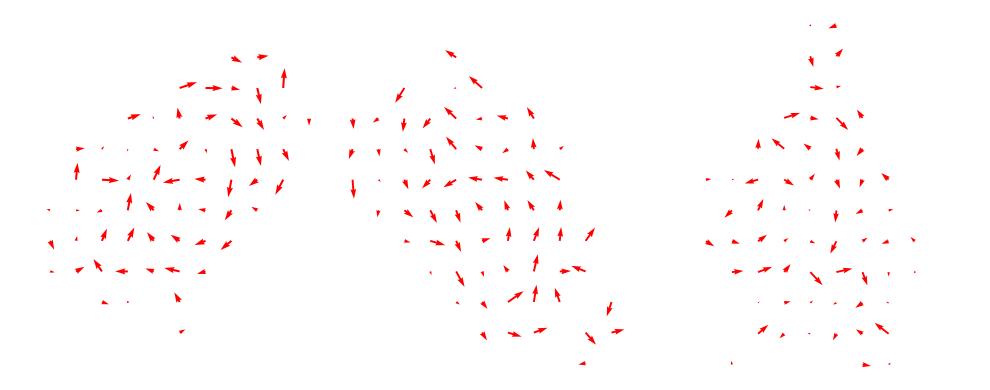

In [35]:
run = zong_run
grid_n=13
square_radius=None
arrow_alpha=0
scatter_alpha=0

fig, axs = plt.subplots(nrows=1, ncols=3, squeeze=False, layout='tight', figsize=(10, 4))
axs = axs.T
e1, e2 = np.zeros(6), np.zeros(6)
e1[0] = 1
e2[1] = 1

for idx, latents in enumerate([run.pro_latents, run.jpca_latents, run.ica_latents]):
    ax: plt.Axes = axs[idx,0]
    
    plot_history_with_tail(ax, latents, current_t, tail_length=1, invisible=True)

    if idx == 2:
        ax.set_xlim([-6,6])
        ax.set_ylim([-3,5])

    d_latents = np.diff(latents, axis=0)
    d_latents = d_latents / np.linalg.norm(d_latents, axis=1)[:, np.newaxis]
    
    x1, x2, y1, y2 = ax.axis()
    x_points = np.linspace(x1, x2, grid_n)
    y_points = np.linspace(y1, y2, grid_n)
    if square_radius is not None:
        x_points = np.linspace(-square_radius, square_radius, grid_n)
        y_points = np.linspace(-square_radius, square_radius, grid_n)

    origins = []
    arrows = []
    n_points = []
    for i in range(len(x_points) - 1):
        for j in range(len(y_points) - 1):
            proj_1 = (latents[:-1] @ e1)
            proj_2 = (latents[:-1] @ e2)
            s = (x_points[i] <= proj_1) & (proj_1 < x_points[i + 1]) & (y_points[j] <= proj_2) & (
                    proj_2 < y_points[j + 1])
            if s.sum():
                arrow = d_latents[s].mean(axis=0)
                arrow = arrow / np.linalg.norm(arrow)
                arrows.append(arrow)
                origins.append([x_points[i:i + 2].mean(), y_points[j:j + 2].mean()])
                n_points.append(s.sum())
    origins, arrows, n_points = np.array(origins), np.array(arrows), np.array(n_points)
    # n_points = n_points / 5
    n_points = n_points > 15
    # n_points = 1
    ax.quiver(origins[:, 0], origins[:, 1], arrows @ e1, arrows @ e2, scale=1 / 20, alpha=n_points, units='dots', color='red')

    # ax.axis('equal')
    ax.axis('off')

axs[0, 0].set_ylabel('pro')
axs[1, 0].set_ylabel('jpca')
axs[2, 0].set_ylabel('ica')

## Stimulation figure

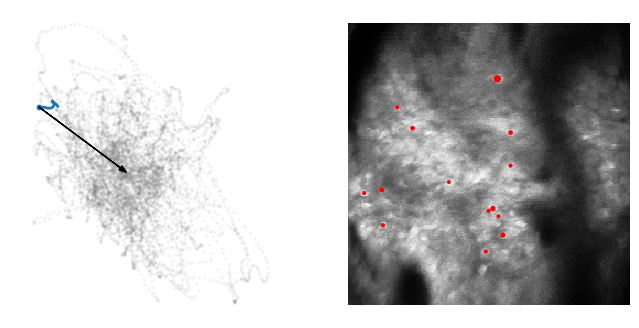

In [70]:
run = zong_run
latents = run.jpca_latents


fig, axs = plt.subplots(ncols=2,figsize=(8,4))


dim_1, dim_2 = 0,1


planes = []
for i in range(500):
    run.d.raw_images.seek(i)
    planes.append(np.array(run.d.raw_images))

im = np.mean(planes, axis=0)

means = np.mean(latents, axis=0)

tail_length = 1
with AnimationManager(fig=fig, make_axs=False, fps=20, filetype='mp4') as am:
    for current_t in np.linspace(500, 540, 40*20):
        last_frame = current_t == 540
        
        ax = axs[0]
        ax.cla()
        # plot_history_with_tail(ax, latents, current_t, tail_length=1)
        plot_history_with_tail(ax, latents, current_t, tail_length=1, invisible=False)

        s = latents.t <= current_t
        current_state = latents[s][-1]

        if last_frame:
            ax.arrow(
            current_state[dim_1], current_state[dim_2], means[dim_1] - current_state[dim_1], means[dim_2] - current_state[dim_2], 
            zorder=5, color='k', length_includes_head=True,  width=0.001, head_width=.04,
            )
        ax.axis('equal');

        
        ax = axs[1]
        ax.cla()
        if last_frame:
            desired_state = means - current_state
            desired_stim = (desired_state @ run.pro.Q.T)[:run.d.neural_data.a.shape[-1]]
    
            desired_stim = np.abs(desired_stim)
            desired_stim[np.abs(desired_stim) < .1] = np.nan
    
            ax.matshow(-im, cmap='Grays')
            xs, ys = list(zip(*[cell['med'] for cell in run.d.stat]))
            
    
            ax.scatter(ys, xs, s=desired_stim*30, color='red')
            # ax.set_title(f'{current_t:.2f}')
        ax.axis('off')
        if not last_frame:
            am.grab_frame()

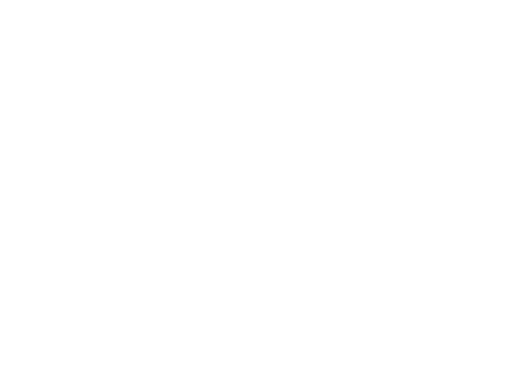